In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')
#执行第一步，连接谷歌云盘

Mounted at /content/drive


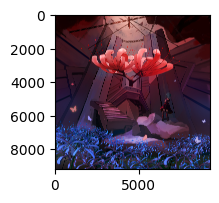

In [3]:
I = mpimg.imread('/content/drive/MyDrive/python 研究/6彼岸开绽2 .jpg')
plt.figure(figsize=(2,2))
plt.imshow(I)
#检查是否连上了谷歌云

# 从云盘中构建图

In [107]:
df = pd.read_csv('/content/drive/MyDrive/连接关系和点权重/福州链接关系.csv')
df_2 = pd.read_csv('/content/drive/MyDrive/连接关系和点权重/福州点属性.csv')

In [108]:
# 过滤空节点
df = df.dropna(subset=["前一节点", "后一节点"])
G = nx.from_pandas_edgelist(df,"前一节点","后一节点", edge_attr=True, create_using=nx.MultiGraph())  #edge_attr=True,边的属性信息也要导入

In [109]:
# 读取CSV文件
df_links = df
df_attributes = df_2

# 创建一个空的多重图
G = nx.MultiGraph()

# 添加节点和边到多重图
for _, row in df_links.iterrows():
    node1 = row['前一节点']
    node2 = row['后一节点']
    edge_attr = row['线路名称']
    if pd.notna(node1) and pd.notna(node2):
        G.add_edge(node1, node2, attribute=edge_attr)


# 添加节点属性到多重图
for _, row in df_attributes.iterrows():
    node = row['节点名称']
    #attr1 = row['区域属性']
    attr2 = row['线路']
    attr3 = row['500M内文保单位/古迹遗址/宗祠故地的个数']
    #attr4 = row['300M内文保单位/古迹遗址/宗祠故地的个数']
    #attr5 = row['800M内文保单位/古迹遗址/宗祠故地的个数']

    if pd.notna(node):
        G.add_node(node)
        #G.nodes[node]['区域属性'] = attr1
        G.nodes[node]['线路'] = attr2
        G.nodes[node]['500M内文保单位/古迹遗址/宗祠故地的个数'] = attr3

        #G.nodes[node]['300M内文保单位/古迹遗址/宗祠故地的个数'] = attr4

        #G.nodes[node]['800M内文保单位/古迹遗址/宗祠故地的个数'] = attr5


In [110]:
#查看节点的属性
for node, attrs in G.nodes.data():
    print("Node:", node)
    print("Attributes:", attrs)
    print()

Node: 西门
Attributes: {'线路': '88路', '500M内文保单位/古迹遗址/宗祠故地的个数': 6.0}

Node: 湖头街
Attributes: {'线路': '1路', '500M内文保单位/古迹遗址/宗祠故地的个数': 4.0}

Node: 光荣路
Attributes: {'线路': '1路', '500M内文保单位/古迹遗址/宗祠故地的个数': 0.0}

Node: 陆庄
Attributes: {'线路': '88路', '500M内文保单位/古迹遗址/宗祠故地的个数': 3.0}

Node: 高峰桥
Attributes: {'线路': '111路', '500M内文保单位/古迹遗址/宗祠故地的个数': 3.0}

Node: 南街
Attributes: {'线路': '117路', '500M内文保单位/古迹遗址/宗祠故地的个数': 21.0}

Node: 道山路口
Attributes: {'线路': '117路', '500M内文保单位/古迹遗址/宗祠故地的个数': 15.0}

Node: 南门
Attributes: {'线路': '133路', '500M内文保单位/古迹遗址/宗祠故地的个数': 6.0}

Node: 茶亭
Attributes: {'线路': '133路', '500M内文保单位/古迹遗址/宗祠故地的个数': 0.0}

Node: 洋头口
Attributes: {'线路': '133路', '500M内文保单位/古迹遗址/宗祠故地的个数': 0.0}

Node: 省人民医院
Attributes: {'线路': '20路', '500M内文保单位/古迹遗址/宗祠故地的个数': 4.0}

Node: 文化宫
Attributes: {'线路': '20路', '500M内文保单位/古迹遗址/宗祠故地的个数': 3.0}

Node: 达道
Attributes: {'线路': '3路', '500M内文保单位/古迹遗址/宗祠故地的个数': 4.0}

Node: 地铁达道站
Attributes: {'线路': '3路', '500M内文保单位/古迹遗址/宗祠故地的个数': 2.0}

Node: 新玉环路
Attributes: {'线路': '1路', '500M内文保单

In [111]:
#查看边属性
for u, v, attr in G.edges(data=True):
    print(f"边 ({u}, {v}) 的属性:")
    for key, value in attr.items():
        print(f"{key}: {value}")
    print()

边 (西门, 湖头街) 的属性:
attribute: 1路

边 (西门, 湖头街) 的属性:
attribute: 88路

边 (西门, 西湖) 的属性:
attribute: 111路

边 (西门, 西湖) 的属性:
attribute: 88路

边 (西门, 高峰桥) 的属性:
attribute: 111路

边 (西门, 陆庄) 的属性:
attribute: 88路

边 (湖头街, 光荣路) 的属性:
attribute: 1路

边 (湖头街, 西洪路) 的属性:
attribute: 88路

边 (光荣路, 陆庄) 的属性:
attribute: 1路

边 (陆庄, 高峰桥) 的属性:
attribute: 1路

边 (陆庄, 高峰桥) 的属性:
attribute: 5路

边 (陆庄, 高峰桥) 的属性:
attribute: 16路

边 (陆庄, 高峰桥) 的属性:
attribute: 22路

边 (陆庄, 高峰桥) 的属性:
attribute: 111路

边 (陆庄, 柳桥) 的属性:
attribute: 5路

边 (陆庄, 柳桥) 的属性:
attribute: 16路

边 (陆庄, 柳桥) 的属性:
attribute: 22路

边 (陆庄, 柳桥) 的属性:
attribute: 111路

边 (陆庄, 孟超肝胆医院西洪院区(鸡角弄)) 的属性:
attribute: 88路

边 (高峰桥, 南街) 的属性:
attribute: 1路

边 (高峰桥, 三坊七巷) 的属性:
attribute: 5路

边 (高峰桥, 三坊七巷) 的属性:
attribute: 22路

边 (高峰桥, 省话剧院) 的属性:
attribute: 16路

边 (南街, 道山路口) 的属性:
attribute: 1路

边 (南街, 道山路口) 的属性:
attribute: 8路

边 (南街, 道山路口) 的属性:
attribute: 20路

边 (南街, 道山路口) 的属性:
attribute: 117路

边 (南街, 鼓楼) 的属性:
attribute: 8路

边 (南街, 鼓楼) 的属性:
attribute: 20路

边 (南街, 尚宾路口) 的属性:
attribute: 117路


In [112]:
# 获取图G的节点数量
num_nodes = G.number_of_nodes()

print("图G的节点数量为:", num_nodes)

图G的节点数量为: 519


# 获取邻接矩阵

In [113]:
# 获取邻接矩阵
adj_matrix = nx.adjacency_matrix(G)  # nx.adjacency_matrix(G)



# 将邻接矩阵转换为NumPy数组
adj_array = adj_matrix.toarray()

#打印邻接矩阵
print(adj_array[10])
print(len(adj_array))


[0 0 0 0 0 0 0 0 0 3 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [114]:
import numpy as np
from scipy.sparse import issparse

def is_adjacency_matrix(adj_matrix, directed=False, allow_self_loops=False):
    """
    检测一个矩阵是否是标准的邻接矩阵。

    参数：
    adj_matrix: np.ndarray 或 scipy.sparse - 输入的矩阵
    directed: bool - 是否允许有向图，默认为 False（即无向图）
    allow_self_loops: bool - 是否允许自环，默认为 False

    返回：
    bool - 如果是标准的邻接矩阵返回 True，否则返回 False
    """
    # 如果是稀疏矩阵，先转为密集矩阵
    if issparse(adj_matrix):
        adj_matrix = adj_matrix.toarray()

    # 检查是否是方阵
    if adj_matrix.shape[0] != adj_matrix.shape[1]:
        return False

    # 检查是否非负
    if not np.all(adj_matrix >= 0):
        return False

    # 检查对称性（无向图）
    if not directed and not np.array_equal(adj_matrix, adj_matrix.T):
        return False

    # 检查主对角线是否为 0（无自环）
    if not allow_self_loops and not np.all(np.diag(adj_matrix) == 0):
        return False

    return True

from scipy.sparse import csr_matrix



print(is_adjacency_matrix(adj_matrix))  # 输出: True


True


In [115]:
#获取节点编号列表
node_ids = list(G.nodes())

# 构建邻接矩阵
adj_matrix = nx.adjacency_matrix(G, nodelist=node_ids)

# 将邻接矩阵转换为DataFrame
df1 = pd.DataFrame(adj_matrix.toarray(), index=node_ids, columns=node_ids)

# 保存DataFrame到CSV文件
#df1.to_csv('/content/drive/MyDrive/python 研究/XXXXX', index=True, header=True)

In [116]:
print(len(list(G.nodes())))
list(G.nodes())[472]

519


'桔园三期'

# 获取节点属性（权重）

In [117]:
node_attributes = G.nodes.data()
target_attribute = '500M内文保单位/古迹遗址/宗祠故地的个数'
attribute=[]


target_attribute_2 = '300M内文保单位/古迹遗址/宗祠故地的个数'
attribute_2=[]


target_attribute_3 = '800M内文保单位/古迹遗址/宗祠故地的个数'
attribute_3=[]


In [118]:
# 遍历节点属性，获取指定属性的值
for node, attributes in node_attributes:
    if target_attribute in attributes:
        attribute_value = attributes[target_attribute]

        attribute.append(attribute_value)
    else:
        attribute.append(-1)

    print("节点:", node)
    print("属性:", target_attribute, "=", attribute_value)
    print()

节点: 西门
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 6.0

节点: 湖头街
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 4.0

节点: 光荣路
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 陆庄
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 3.0

节点: 高峰桥
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 3.0

节点: 南街
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 21.0

节点: 道山路口
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 15.0

节点: 南门
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 6.0

节点: 茶亭
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 洋头口
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 省人民医院
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 4.0

节点: 文化宫
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 3.0

节点: 达道
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 4.0

节点: 地铁达道站
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 2.0

节点: 新玉环路
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 3.0

节点: 安平小区
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 3.0

节点: 闽江之心(台州步行街)
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 1.0

节点: 桥南
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 3.0

节点: 埔顶
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 3.0

节点: 龙津站
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 5.0

节点: 三叉街
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 2.0

节点: 三叉街新村
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 则徐大道盖山路口
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 白湖亭
属性: 500M内文

In [119]:
# 遍历节点属性，获取指定属性的值
for node, attributes in node_attributes:
    if target_attribute_2 in attributes:
        attribute_value = attributes[target_attribute_2]

        attribute_2.append(attribute_value)
    else:
        attribute_2.append(-1)

    print("节点:", node)
    print("属性:", target_attribute_2, "=", attribute_value)
    print()

节点: 西门
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 湖头街
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 光荣路
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 陆庄
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 高峰桥
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 南街
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 道山路口
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 南门
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 茶亭
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 洋头口
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 省人民医院
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 文化宫
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 达道
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 地铁达道站
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 新玉环路
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 安平小区
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 闽江之心(台州步行街)
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 桥南
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 埔顶
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 龙津站
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 三叉街
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 三叉街新村
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 则徐大道盖山路口
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 白湖亭
属性: 300M内文保单

In [120]:
# 遍历节点属性，获取指定属性的值
for node, attributes in node_attributes:
    if target_attribute_3 in attributes:
        attribute_value = attributes[target_attribute_3]

        attribute_3.append(attribute_value)
    else:
        attribute_3.append(-1)

    print("节点:", node)
    print("属性:", target_attribute_3, "=", attribute_value)
    print()

节点: 西门
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 湖头街
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 光荣路
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 陆庄
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 高峰桥
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 南街
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 道山路口
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 南门
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 茶亭
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 洋头口
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 省人民医院
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 文化宫
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 达道
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 地铁达道站
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 新玉环路
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 安平小区
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 闽江之心(台州步行街)
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 桥南
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 埔顶
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 龙津站
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 三叉街
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 三叉街新村
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 则徐大道盖山路口
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 白湖亭
属性: 800M内文保单

In [121]:
#获取权重
attribute=np.array(attribute)
print(attribute.shape)

#获取权重
attribute_2=np.array(attribute_2)
print(attribute_2.shape)

#获取权重
attribute_3=np.array(attribute_3)
print(attribute_3.shape)

(519,)
(519,)
(519,)


In [122]:
#打印权重
print(attribute)
print(attribute_2)
print(attribute_3)

[ 6.  4.  0.  3.  3. 21. 15.  6.  0.  0.  4.  3.  4.  2.  3.  3.  1.  3.
  3.  5.  2.  0.  0.  0.  0.  0.  0.  2.  3.  0.  0.  3.  3.  6.  5.  0.
  1.  2.  4.  4.  4.  4.  5.  6.  4.  4.  0.  0.  1.  1.  1.  0.  1.  1.
  6.  7.  8.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  2.  3.  6.  5.  5.  3.  4.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  1.  6.  5.  0.  0.  0.  0.  0.
  1.  1.  1.  2.  3.  3.  4.  4.  5.  3.  2.  0.  2.  2.  1.  0.  0.  0.
  0.  2.  2.  2.  3.  4.  0.  0.  2.  4.  1.  2.  0.  3.  2.  0.  3.  2.
  2.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  1.
  3.  3.  1.  3.  6.  1.  3.  2.  2.  0.  0.  2.  0.  1.  0.  3.  3.  2.
  2.  0.  1.  3.  3.  3.  4.  1.  2.  0.  0.  0.  3.  2.  3.  4.  2.  0.
  0.  0.  0.  0.  0.  0.  3.  1.  0.  2.  2.  0.  2.  5.  3.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  1.  4.  1.  4.  7.  8.  2.
  4.  5.  1.  1.  1.  2.  3.  7.  0.  0.  0.  0.  3

# 获取权重(区域)的方法

In [123]:
node_attributes = G.nodes.data()
target_regional_attribute = '区域属性'
regional_attribute=[]

In [124]:
# 遍历节点属性，获取指定属性的值
for node, attributes in node_attributes:
    if target_regional_attribute in attributes:
        attribute_value = attributes[target_regional_attribute]

        regional_attribute.append(attribute_value)
    else:
        regional_attribute.append(-1)

    print("节点:", node)
    print("属性:", target_regional_attribute, "=", attribute_value)
    print()

节点: 西门
属性: 区域属性 = 0.0

节点: 湖头街
属性: 区域属性 = 0.0

节点: 光荣路
属性: 区域属性 = 0.0

节点: 陆庄
属性: 区域属性 = 0.0

节点: 高峰桥
属性: 区域属性 = 0.0

节点: 南街
属性: 区域属性 = 0.0

节点: 道山路口
属性: 区域属性 = 0.0

节点: 南门
属性: 区域属性 = 0.0

节点: 茶亭
属性: 区域属性 = 0.0

节点: 洋头口
属性: 区域属性 = 0.0

节点: 省人民医院
属性: 区域属性 = 0.0

节点: 文化宫
属性: 区域属性 = 0.0

节点: 达道
属性: 区域属性 = 0.0

节点: 地铁达道站
属性: 区域属性 = 0.0

节点: 新玉环路
属性: 区域属性 = 0.0

节点: 安平小区
属性: 区域属性 = 0.0

节点: 闽江之心(台州步行街)
属性: 区域属性 = 0.0

节点: 桥南
属性: 区域属性 = 0.0

节点: 埔顶
属性: 区域属性 = 0.0

节点: 龙津站
属性: 区域属性 = 0.0

节点: 三叉街
属性: 区域属性 = 0.0

节点: 三叉街新村
属性: 区域属性 = 0.0

节点: 则徐大道盖山路口
属性: 区域属性 = 0.0

节点: 白湖亭
属性: 区域属性 = 0.0

节点: 火车站北广场
属性: 区域属性 = 0.0

节点: 铁道医院
属性: 区域属性 = 0.0

节点: 华林高架
属性: 区域属性 = 0.0

节点: 湖塍
属性: 区域属性 = 0.0

节点: 洋下新村
属性: 区域属性 = 0.0

节点: 省图书馆
属性: 区域属性 = 0.0

节点: 温泉路口
属性: 区域属性 = 0.0

节点: 闽江饭店
属性: 区域属性 = 0.0

节点: 蒙古营
属性: 区域属性 = 0.0

节点: 龙华天桥
属性: 区域属性 = 0.0

节点: 五一广场
属性: 区域属性 = 0.0

节点: 市政务服务中心
属性: 区域属性 = 0.0

节点: 茶亭公园
属性: 区域属性 = 0.0

节点: 汇多利
属性: 区域属性 = 0.0

节点: 市一医院
属性: 区域属性 = 0.0

节点: 十四桥
属性: 区域属性 = 0.0

节点: 朝阳路口
属

In [125]:
#获取权重
regional_attribute=np.array(regional_attribute)
regional_attribute.shape

(519,)

In [126]:
#打印权重
print(regional_attribute)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

In [127]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


sklearn.preprocessing 模块包含了多种数据预处理和标准化的算法。

LabelEncoder和OneHotEncoder都是其中的类,用于分类数据的编码转换。

In [128]:
# 创建LabelEncoder
le = LabelEncoder()
# 对district_names进行编码
district_encoded = le.fit_transform(regional_attribute)

# 创建OneHotEncoder
ohe = OneHotEncoder()
# 对编码后的结果进行独热编码
district_onehot = ohe.fit_transform(district_encoded.reshape(-1,1)).toarray()

In [129]:
print(district_onehot)
print(len(district_onehot))

print(district_onehot[10])
print(district_onehot[14])

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.

# 将图的边转换为edge_index

In [130]:
 #获取图的边列表
edge_list = list(G.edges())

# 将边列表转换为 edge_index
edge_index = np.array(edge_list).T

# 打印结果
edge_index= np.array(edge_index)
edge_index

array([['西门', '西门', '西门', ..., '桥北', '西洪凤里', '闽江世纪广场'],
       ['湖头街', '湖头街', '西湖', ..., '雁塔', '八一六花园', '曙光支路东站']], dtype='<U15')

In [131]:
#查看边的数量
edge_index.shape

(2, 1033)

**提取纯数字的edge_index**

In [132]:
# 获取 NetworkX 内部的节点编号，这串代码会直接创建一个新的图，并且替换掉里面的所有文字，变成数字
G2 = nx.convert_node_labels_to_integers(G)
# 获取图的边列表
edge_list_number = list(G2.edges())
# 将边列表转换为 edge_index
edge_index_number = np.array(edge_list_number).T

# 打印结果
edge_index_number= np.array(edge_index_number)
print(edge_index_number)
print(edge_index_number.shape)

#shape 格式与上方一致即可进行下一步

[[  0   0   0 ... 512 515 517]
 [  1   1 493 ... 513 516 518]]
(2, 1033)


**创建节点映射字典**

In [133]:
# 获取 NetworkX 内部的节点编号，这串代码会直接创建一个新的图，并且替换掉里面的所有文字，变成数字
G_int_labels = nx.convert_node_labels_to_integers(G)

In [134]:
#dir(G_int_labels)   #查看G_int_labels 支持的后缀
G_int_labels.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [135]:
list1=G_int_labels.nodes
list1=np.array(list1)
list1

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [136]:
list_1=G.nodes.data()
list_1=np.array(list_1)
print(list_1[6][0])

list_2=list_1
list2 = []  # 创建一个空列表，用于存储遍历结果

for item in list_2:
    list2.append(item[0])

list2=np.array(list2)

#list2 #此处可以查看list2

道山路口


In [137]:
list1 = list1
list2 = list2
mapping_dict = { }  # 创建一个空字典

for i in range(len(list1)):
    key = str(list1[i])  # 将整数转换为字符串作为键
    value = list2[i]  # 节点名称作为值
    mapping_dict[key] = value

In [138]:
mapping_dict["16"]

'闽江之心(台州步行街)'

In [139]:
mapping_dict

{'0': '西门',
 '1': '湖头街',
 '2': '光荣路',
 '3': '陆庄',
 '4': '高峰桥',
 '5': '南街',
 '6': '道山路口',
 '7': '南门',
 '8': '茶亭',
 '9': '洋头口',
 '10': '省人民医院',
 '11': '文化宫',
 '12': '达道',
 '13': '地铁达道站',
 '14': '新玉环路',
 '15': '安平小区',
 '16': '闽江之心(台州步行街)',
 '17': '桥南',
 '18': '埔顶',
 '19': '龙津站',
 '20': '三叉街',
 '21': '三叉街新村',
 '22': '则徐大道盖山路口',
 '23': '白湖亭',
 '24': '火车站北广场',
 '25': '铁道医院',
 '26': '华林高架',
 '27': '湖塍',
 '28': '洋下新村',
 '29': '省图书馆',
 '30': '温泉路口',
 '31': '闽江饭店',
 '32': '蒙古营',
 '33': '龙华天桥',
 '34': '五一广场',
 '35': '市政务服务中心',
 '36': '茶亭公园',
 '37': '汇多利',
 '38': '市一医院',
 '39': '十四桥',
 '40': '朝阳路口',
 '41': '朝阳路',
 '42': '港头(朝阳路)',
 '43': '中垱',
 '44': '美墩桥',
 '45': '过洲岛',
 '46': '华威大厦(江边村)',
 '47': '东部办公区(石碑兜)',
 '48': '仓山浦下',
 '49': '龙舟河',
 '50': '公交海峡国际会展中心西站',
 '51': '火车站南广场',
 '52': '茶园',
 '53': '电建二公司',
 '54': '于山',
 '55': '乌山路口',
 '56': '福州市政府',
 '57': '上海街道',
 '58': '白马河',
 '59': '宝龙城市广场',
 '60': '祥坂路口',
 '61': '福祥社区',
 '62': '上浦路口',
 '63': '市人才储备中心',
 '64': '榕城广场',
 '65': '福州金山中学',
 '66': '

In [140]:
#建立反向查询字典
mapping_dict_r = { }  # 创建一个空字典

for i in range(len(list2)):
    key = str(list2[i])  # 将整数转换为字符串作为键
    value = list1[i]  # 节点名称作为值
    mapping_dict_r[key] = value

In [141]:
mapping_dict_r["道山路口"]

6

# 统计已有信息

In [142]:
#邻接矩阵
print(adj_array)
print(adj_array.shape)

[[0 2 0 ... 0 0 0]
 [2 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]]
(519, 519)


In [143]:
#500m内古迹的数量，作为权重
print(attribute)
print(attribute.shape)

[ 6.  4.  0.  3.  3. 21. 15.  6.  0.  0.  4.  3.  4.  2.  3.  3.  1.  3.
  3.  5.  2.  0.  0.  0.  0.  0.  0.  2.  3.  0.  0.  3.  3.  6.  5.  0.
  1.  2.  4.  4.  4.  4.  5.  6.  4.  4.  0.  0.  1.  1.  1.  0.  1.  1.
  6.  7.  8.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  2.  3.  6.  5.  5.  3.  4.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  1.  6.  5.  0.  0.  0.  0.  0.
  1.  1.  1.  2.  3.  3.  4.  4.  5.  3.  2.  0.  2.  2.  1.  0.  0.  0.
  0.  2.  2.  2.  3.  4.  0.  0.  2.  4.  1.  2.  0.  3.  2.  0.  3.  2.
  2.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  1.
  3.  3.  1.  3.  6.  1.  3.  2.  2.  0.  0.  2.  0.  1.  0.  3.  3.  2.
  2.  0.  1.  3.  3.  3.  4.  1.  2.  0.  0.  0.  3.  2.  3.  4.  2.  0.
  0.  0.  0.  0.  0.  0.  3.  1.  0.  2.  2.  0.  2.  5.  3.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  1.  4.  1.  4.  7.  8.  2.
  4.  5.  1.  1.  1.  2.  3.  7.  0.  0.  0.  0.  3

In [144]:
#300m内古迹的数量，作为权重
print(attribute_2)
print(attribute_2.shape)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

In [145]:
#800m内古迹的数量，作为权重
print(attribute_3)
print(attribute_3.shape)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

In [146]:
#检查权重是否都大于等于0，如果不是，那么权重矩阵有问题。 自行修改arr的值进行检查
arr = attribute

if (arr >= 0).all():
  print('True')
else:
  print('False')

True


**拼接邻接矩阵和古迹数量矩阵和区域矩阵**

In [45]:
print(district_onehot)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.

In [46]:
district_onehot=np.array(district_onehot)#将独热编码转换为np数组

In [47]:
district_onehot.T.shape#查看转置

(1, 519)

**不要执行以下几项，因为数据不齐全**

In [48]:
matrix_onehot_unite= np.concatenate((adj_array, district_onehot), axis=1)#将邻接矩阵和独热编码拼接

In [49]:
matrix_onehot_unite.shape

(519, 520)

**拼接邻接矩阵独热编码矩阵+古迹数量矩阵(473+6+1+1+1)**

In [50]:
attribute_combined=np.concatenate((matrix_onehot_unite, attribute.reshape(-1,1)), axis=1)
attribute_combined_1=np.concatenate((attribute_combined, attribute_2.reshape(-1,1)), axis=1)
attribute_combined_1=np.concatenate((attribute_combined_1, attribute_3.reshape(-1,1)), axis=1)
print(attribute_combined_1.shape)
print(len(attribute_combined_1))

(519, 523)
519


**福州从此处开始执行**

In [147]:
attribute_combined_1=np.concatenate((adj_array, attribute.reshape(-1,1)), axis=1)
print(attribute_combined_1.shape)
print(len(attribute_combined_1))

(519, 520)
519


**福州不要执行以下代码**

**参考标签制作，此处需要将古迹数量的节点进行归类**

In [52]:
#此处需要将古迹数量的节点进行归类，可以选择3类4类都可以，这个归类会影响最终结果。这是计算机在向你询问边界是什么样子的。
#注意调整range的值，针对徐州，因为有三个层级的数据，可以考虑加权求和。
attribute_label=[]
for i in range(len(attribute_combined_1)):
  if (attribute[i]*1.0+attribute_3[i]*0.5+(attribute_3[i]-attribute[i])*0.2)<3 :
    attribute_label.append(0)
  elif (attribute[i]*1.0+attribute_3[i]*0.5+(attribute_3[i]-attribute[i])*0.2)<=6:
    attribute_label.append(1)
  else:
    attribute_label.append(2)


attribute_label=np.array(attribute_label)
attribute_label.shape

(519,)

**在福州数据不全的情况下，用此代码进行标签制作**

In [148]:
attribute_label=[]
for i in range(len(attribute_combined_1)):
  if  attribute[i]<3 :
     attribute_label.append(0)
  elif attribute[i]<=6:
     attribute_label.append(1)
  else:
     attribute_label.append(2)

attribute_label=np.array(attribute_label)
attribute_label.shape

(519,)

**点和点的链接关系**

In [149]:
#点和点的连接关系，另一种表现形式,从边的角度考虑
print(edge_index)
print(edge_index.shape)

[['西门' '西门' '西门' ... '桥北' '西洪凤里' '闽江世纪广场']
 ['湖头街' '湖头街' '西湖' ... '雁塔' '八一六花园' '曙光支路东站']]
(2, 1033)


In [150]:
print(edge_index_number)
print(edge_index_number.shape)

[[  0   0   0 ... 512 515 517]
 [  1   1 493 ... 513 516 518]]
(2, 1033)


**节点和数字间的映射关系**

In [151]:
#节点和数字间的映射关系
print(mapping_dict)
print(len(mapping_dict))

{'0': '西门', '1': '湖头街', '2': '光荣路', '3': '陆庄', '4': '高峰桥', '5': '南街', '6': '道山路口', '7': '南门', '8': '茶亭', '9': '洋头口', '10': '省人民医院', '11': '文化宫', '12': '达道', '13': '地铁达道站', '14': '新玉环路', '15': '安平小区', '16': '闽江之心(台州步行街)', '17': '桥南', '18': '埔顶', '19': '龙津站', '20': '三叉街', '21': '三叉街新村', '22': '则徐大道盖山路口', '23': '白湖亭', '24': '火车站北广场', '25': '铁道医院', '26': '华林高架', '27': '湖塍', '28': '洋下新村', '29': '省图书馆', '30': '温泉路口', '31': '闽江饭店', '32': '蒙古营', '33': '龙华天桥', '34': '五一广场', '35': '市政务服务中心', '36': '茶亭公园', '37': '汇多利', '38': '市一医院', '39': '十四桥', '40': '朝阳路口', '41': '朝阳路', '42': '港头(朝阳路)', '43': '中垱', '44': '美墩桥', '45': '过洲岛', '46': '华威大厦(江边村)', '47': '东部办公区(石碑兜)', '48': '仓山浦下', '49': '龙舟河', '50': '公交海峡国际会展中心西站', '51': '火车站南广场', '52': '茶园', '53': '电建二公司', '54': '于山', '55': '乌山路口', '56': '福州市政府', '57': '上海街道', '58': '白马河', '59': '宝龙城市广场', '60': '祥坂路口', '61': '福祥社区', '62': '上浦路口', '63': '市人才储备中心', '64': '榕城广场', '65': '福州金山中学', '66': '金祥路金洲路口', '67': '金洲南路金山地铁站', '68': '卢滨路东', '69': '卢滨路', '70': '金山公

In [152]:
#节点和数字间的映射关系(翻转)
reversed_dict = {value: key for key, value in mapping_dict.items()}
print(reversed_dict)

{'西门': '0', '湖头街': '1', '光荣路': '2', '陆庄': '3', '高峰桥': '4', '南街': '5', '道山路口': '6', '南门': '7', '茶亭': '8', '洋头口': '9', '省人民医院': '10', '文化宫': '11', '达道': '12', '地铁达道站': '13', '新玉环路': '14', '安平小区': '15', '闽江之心(台州步行街)': '16', '桥南': '17', '埔顶': '18', '龙津站': '19', '三叉街': '20', '三叉街新村': '21', '则徐大道盖山路口': '22', '白湖亭': '23', '火车站北广场': '24', '铁道医院': '25', '华林高架': '26', '湖塍': '27', '洋下新村': '28', '省图书馆': '29', '温泉路口': '30', '闽江饭店': '31', '蒙古营': '32', '龙华天桥': '33', '五一广场': '34', '市政务服务中心': '35', '茶亭公园': '36', '汇多利': '37', '市一医院': '38', '十四桥': '39', '朝阳路口': '40', '朝阳路': '41', '港头(朝阳路)': '42', '中垱': '43', '美墩桥': '44', '过洲岛': '45', '华威大厦(江边村)': '46', '东部办公区(石碑兜)': '47', '仓山浦下': '48', '龙舟河': '49', '公交海峡国际会展中心西站': '50', '火车站南广场': '51', '茶园': '52', '电建二公司': '53', '于山': '54', '乌山路口': '55', '福州市政府': '56', '上海街道': '57', '白马河': '58', '宝龙城市广场': '59', '祥坂路口': '60', '福祥社区': '61', '上浦路口': '62', '市人才储备中心': '63', '榕城广场': '64', '福州金山中学': '65', '金祥路金洲路口': '66', '金洲南路金山地铁站': '67', '卢滨路东': '68', '卢滨路': '69', '金山公园北门': 

**掩码的的制作**

In [247]:
total_nodes = len(attribute_label)#此处相比福州作了改进，我们直接用古迹数量权重列表的长度作为节点总数量
num_false = 200

mask_1 = np.array([False] * num_false + [True] * (total_nodes - num_false))
np.random.shuffle(mask_1)

In [248]:
print(mask_1)
print(mask_1.shape)

[ True  True False  True False  True  True  True False False False False
 False  True  True  True False  True  True  True False  True False  True
 False False  True  True False False False False  True False  True False
  True  True  True  True False  True  True  True  True  True False  True
  True  True False  True False False  True  True  True  True  True  True
  True False False False  True False False  True  True  True  True False
  True  True False  True  True False False False  True False False  True
  True False False False  True  True False False  True False  True  True
  True False  True  True  True  True False False  True  True False  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True False False  True False  True  True
 False False False False  True False False  True  True False False  True
  True  True False  True False False False  True False False  True False
 False  True False  True False False False  True  T

# 分支：图自编码器方法（见昆明ipynb）

In [ ]:
pip install torch_geometric

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data

In [ ]:


# 准备邻接矩阵和节点标签
adj_matrix = adj_array  # 邻接矩阵，可以是二维稀疏张量或二维numpy数组
node_labels = attribute_label # 节点标签，可以是一维张量或一维numpy数组  numeric_array   attribute  attribute_3   attribute_combined_1
node_labels_2=attribute
# 创建一个data对象
data = Data(x=torch.tensor(adj_matrix), edge_index=torch.tensor(adj_matrix.nonzero()), y=torch.tensor(node_labels) ,z=torch.tensor(node_labels_2) ,b=torch.tensor(attribute_combined_1), train_mask=torch.tensor(mask_1))

In [ ]:
# 假设 data.b 是初始特征矩阵，data.inde_edge 是边列表
# 请确保 data.b 和 data.inde_edge 已定义并正确地导入
node_features = torch.tensor(attribute_combined_1, dtype=torch.float32)  # 确保数据类型是 float32
edge_index = torch.tensor(adj_matrix.nonzero(), dtype=torch.long)  # 边列表通常是 long 类型

In [ ]:
# 创建 PyTorch Geometric 的数据对象
graph_data = Data(x=node_features, edge_index=edge_index)

**定义图自编码器**

In [ ]:
class GraphAutoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GraphAutoencoder, self).__init__()
        # 编码器部分
        self.encoder = GCNConv(input_dim, hidden_dim)
        self.hidden_layer = GCNConv(hidden_dim, hidden_dim)
        self.z_layer = GCNConv(hidden_dim, output_dim)

    def encode(self, x, edge_index):
        x = self.encoder(x, edge_index)
        x = F.relu(x)
        x = self.hidden_layer(x, edge_index)
        x = F.relu(x)
        z = self.z_layer(x, edge_index)
        return z

    def decode(self, z, edge_index):
        # 使用内积解码边缘信息
        return torch.sigmoid((z[edge_index[0]] * z[edge_index[1]]).sum(dim=1))

    def forward(self, x, edge_index):
        z = self.encode(x, edge_index)
        reconstructed_edges = self.decode(z, edge_index)
        return z, reconstructed_edges

# 定义模型、损失函数和优化器
input_dim = node_features.shape[1]  # 411
hidden_dim = 10  # 可以自行调整
output_dim = 3  # 目标嵌入维度

model = GraphAutoencoder(input_dim, hidden_dim, output_dim)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.BCELoss()  # 使用二元交叉熵损失函数进行链接重建


In [ ]:
# 训练过程
def train_model():  # 确保使用正确的函数名称
    model.train()
    optimizer.zero_grad()
    z, reconstructed_edges = model(graph_data.x, graph_data.edge_index)
    # 使用边连接来计算重构损失
    loss = criterion(reconstructed_edges, torch.ones(edge_index.size(1), dtype=torch.float32))
    loss.backward()
    optimizer.step()
    return loss.item()

In [ ]:
# 训练模型
loss_remember_AE=[]

num_epochs = 50  # 可以根据需要调整
for epoch in range(num_epochs):
    loss = train_model()  # 确保调用正确的训练函数
    loss_remember_AE.append(loss)
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss:.4f}')
        time.sleep(0.1)

Epoch 0, Loss: 0.6862
Epoch 10, Loss: 0.0010
Epoch 20, Loss: 0.0000
Epoch 30, Loss: 0.0000
Epoch 40, Loss: 0.0000


Text(0, 0.5, 'Loss')

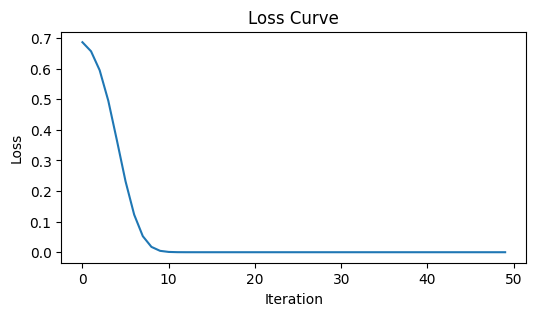

In [ ]:
#查看损失函数,这段代码在徐州时进行修改，确保能多次运行而不会出错。
loss_remember_AE_1=loss_remember_AE

import matplotlib.pyplot as plt
import numpy as np

losses = [loss.detach().numpy() if isinstance(loss, torch.Tensor) else loss for loss in loss_remember_AE_1]

plt.figure(figsize=(6, 3))
plt.plot(losses)
plt.title("Loss Curve")
plt.xlabel("Iteration")
plt.ylabel("Loss")


In [ ]:
# 获取嵌入
model.eval()
with torch.no_grad():
    embeddings, _ = model(graph_data.x, graph_data.edge_index)

print("Node embeddings shape:", embeddings.shape)


Node embeddings shape: torch.Size([463, 3])


In [ ]:
embeddings

tensor([[  9.8978,  -9.3840, -10.6397],
        [ 15.1645, -14.3150, -16.8199],
        [ 18.6255, -17.3984, -20.7797],
        ...,
        [  6.0913,  -5.6500,  -6.2651],
        [  6.3837,  -5.8738,  -6.5276],
        [  5.8609,  -5.1027,  -5.9445]])

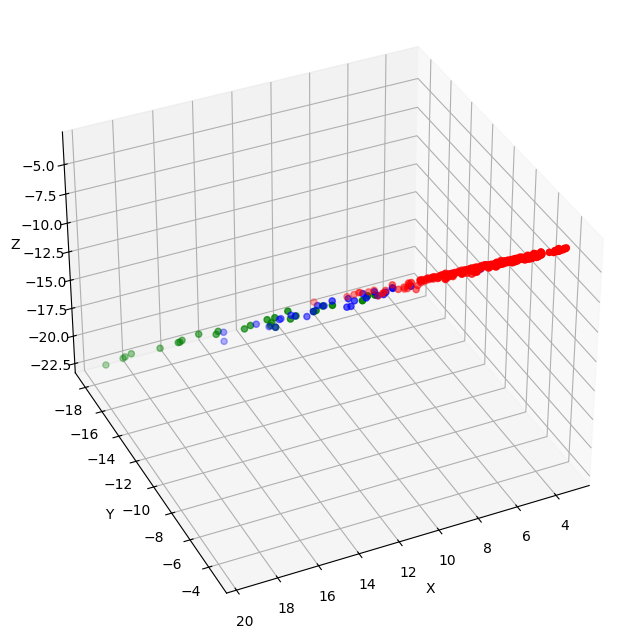

In [ ]:
# 将NumPy数组转换为Python列表
h_12= embeddings.tolist()
B_12=data.y.tolist()

# 提取h的坐标数据
x = [row[0] for row in h_12]
y = [row[1] for row in h_12]
z = [row[2] for row in h_12]

# 创建三维图形对象
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制散点图，并根据列表B的值设置不同的颜色
colors = ['red', 'blue', 'green']
label_set = set(B_12)  # 获取唯一的标签值
for label in label_set:
    indices = [i for i, value in enumerate(B_12) if value == label]
    ax.scatter([x[i] for i in indices], [y[i] for i in indices], [z[i] for i in indices], c=colors[label], marker='o')

# 设置坐标轴标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


# 设置初始视角  elev表示俯仰角  azim表示方位角
ax.view_init(elev=35, azim=65)

# 显示图形
plt.show()

# 构建图神经网络之前的准备工作

In [62]:
# Install required packages.

import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

# Helper function for visualization.
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

2.5.1+cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 41.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


**检查数据集结构是否一致**

In [249]:
from torch_geometric.data import Data

# 准备邻接矩阵和节点标签
adj_matrix = adj_array  # 邻接矩阵，可以是二维稀疏张量或二维numpy数组
node_labels = attribute_label # 节点标签，可以是一维张量或一维numpy数组  numeric_array   attribute  attribute_3   attribute_combined_1
node_labels_2=attribute
# 创建一个data对象
data = Data(x=torch.tensor(adj_matrix), edge_index=torch.tensor(adj_matrix.nonzero()), y=torch.tensor(node_labels) ,z=torch.tensor(node_labels_2) ,b=torch.tensor(attribute_combined_1), train_mask=torch.tensor(mask_1))

In [250]:
data  #检测数据格式是否正确  b是初始特征矩阵

Data(x=[519, 519], edge_index=[2, 1312], y=[519], z=[519], b=[519, 520], train_mask=[519])

In [251]:
data.edge_index.shape

torch.Size([2, 1312])

In [252]:
print(data.edge_index)

tensor([[  0,   0,   0,  ..., 517, 518, 518],
        [  1,   3,   4,  ..., 518, 218, 517]])


**设计一个绘图函数**

In [253]:
def visualize_graph(G, color):
    plt.figure(figsize=(7,7))
    #plt.xticks([])
    #plt.yticks([])
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                     node_color=color, cmap="Set2")
    plt.show()

**设计一个可视化嵌入**

In [254]:
#这段代码目前把第？？个嵌入当成X轴，第？？个嵌入当成Y轴。 此处并非一成不变，要根据情况修改。
import matplotlib.pyplot as plt
import matplotlib.cm as cm
def visualize_embedding(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    #plt.xticks([])
    #plt.yticks([])
    h = h.detach().cpu().numpy()
    scatter=plt.scatter(h[:, 2], h[:, 3], s=70, c=color, cmap="Set2")#Set2  cool


    if epoch is not None and loss is not None:
        plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    plt.colorbar(scatter)
    plt.show()

**用不同形状显示可视化嵌入（这段代码是为了制作图片非彩色图片备份。一般不执行此代码）**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import torch

def visualize_embedding(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    h = h.detach().cpu().numpy()
    color = color.detach().cpu().numpy()

    markers = ['o', '^', 's', 'p', '*', 'x', 'D', '+', 'v', '<', '>']  # 定义标记
    unique_colors = set(color)  # 获取唯一的类别

    for i, u_color in enumerate(unique_colors):
        marker = markers[i % len(markers)]  # 使用不同的标记
        mask = (color == u_color)
        #plt.scatter(h[mask, 0], h[mask, 1], s=70, marker=marker, label=f'Class {u_color}')
        plt.scatter(h[mask, 0], h[mask, 1], s=70, marker=marker)

    if epoch is not None and loss is not None:
        plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)

    plt.legend()
    plt.show()

**开始可视化**

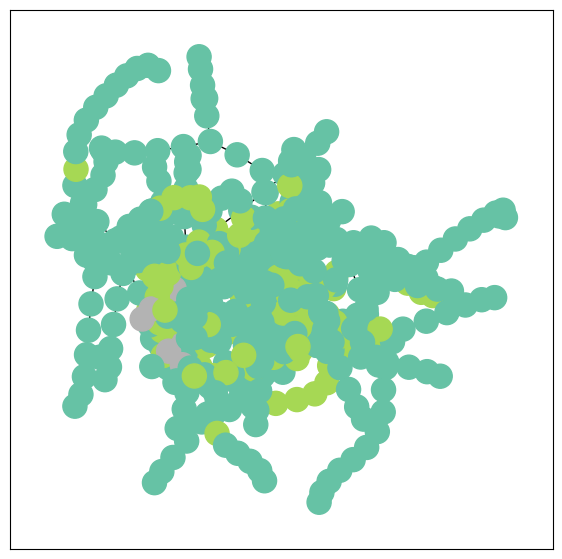

In [255]:
#这步是必要的，请观察是否有独立的节点。没有就是正常。
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize_graph(G, color=data.y)

# 构建图神经网络

In [256]:
len(attribute_combined_1.T)#这是输入端的参数，扬州版本的代码相比福州的进步是：不再需要手动修改

520

In [257]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv
#记得修改输入端的参数，必须保持一致

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(123)
        self.conv1 = GCNConv(len(attribute_combined_1.T), 128)

        self.conv2 = GCNConv(128, 32)

        self.conv3 = GCNConv(32, 6)

        self.classifier = Linear(6, 6)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()

        h = self.conv2(h, edge_index)
        h = h.tanh()

        h = self.conv3(h, edge_index)

        h = h.tanh()  # Final GNN embedding space.

        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(520, 128)
  (conv2): GCNConv(128, 32)
  (conv3): GCNConv(32, 6)
  (classifier): Linear(in_features=6, out_features=6, bias=True)
)


**观察嵌入**

Embedding shape: [519, 6]


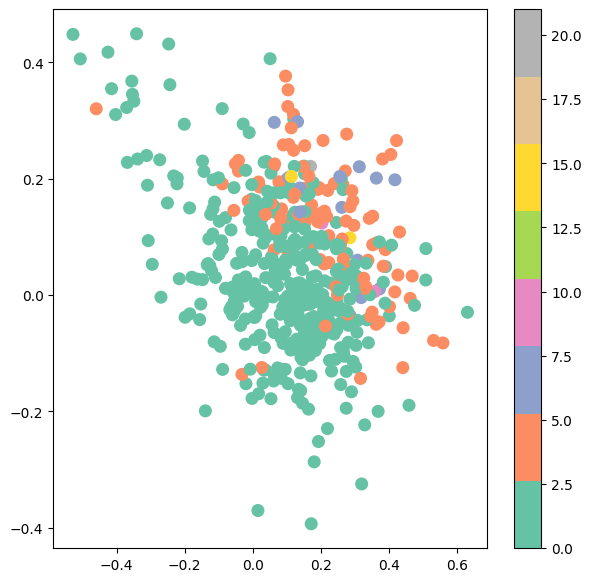

In [258]:
model = GCN()

_, h = model(data.b.float(), data.edge_index)

print(f'Embedding shape: {list(h.shape)}')

visualize_embedding(h, color=data.z)   #data.y  data.z   如果不想要彩色，就用data.y

In [259]:
#再次检查数据结构
print(data.y[data.train_mask])
print(data.train_mask.shape)

tensor([1, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2,
        0, 1, 1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
        0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,

**开始训练模型**

<IPython.core.display.Javascript object>

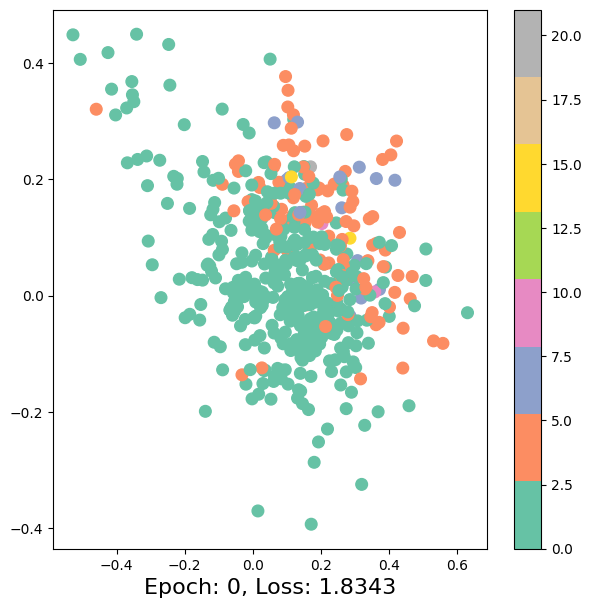

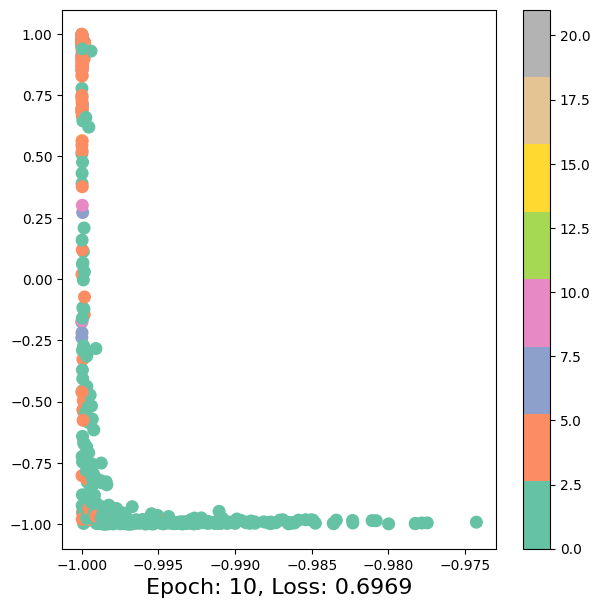

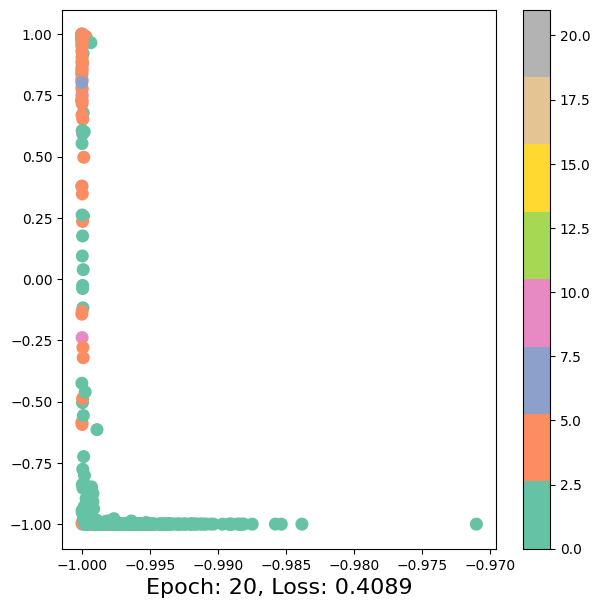

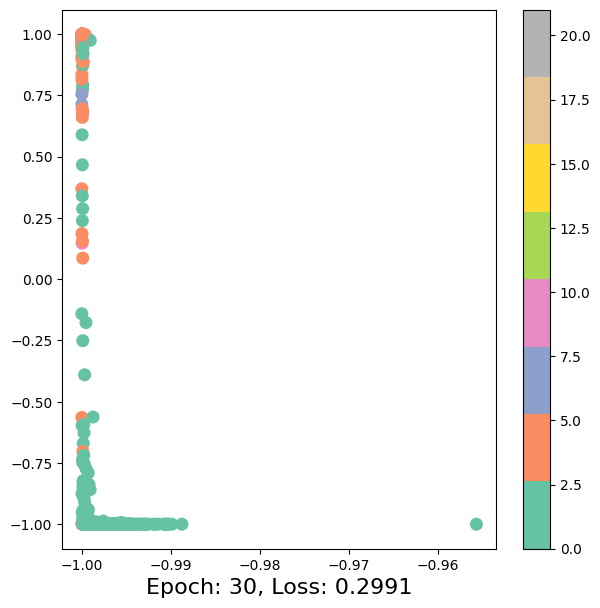

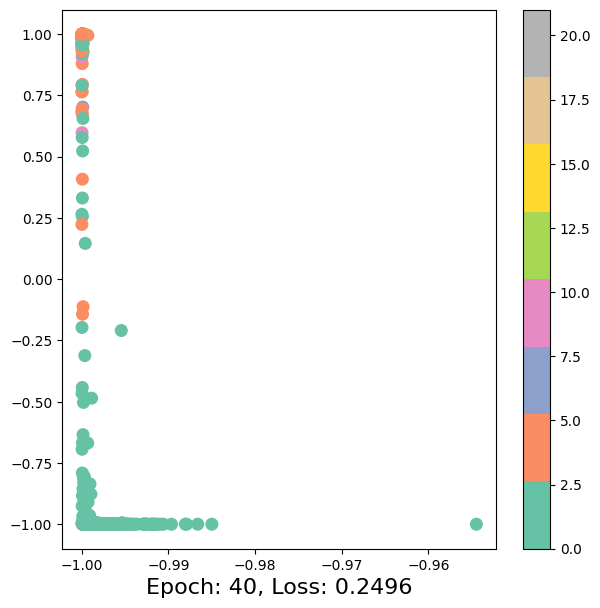

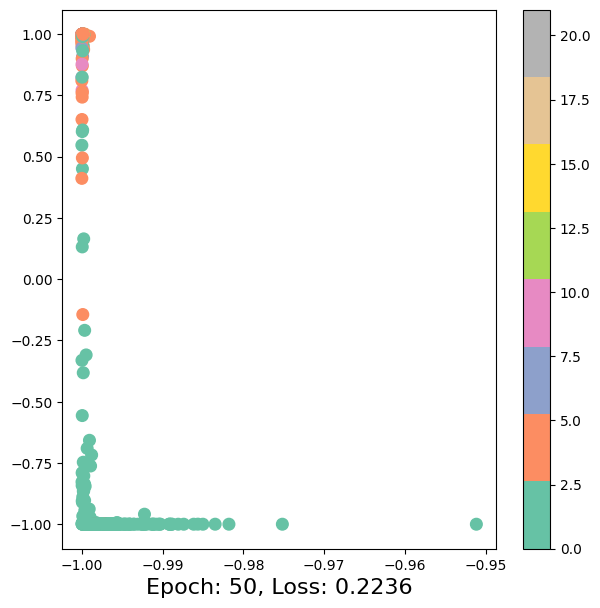

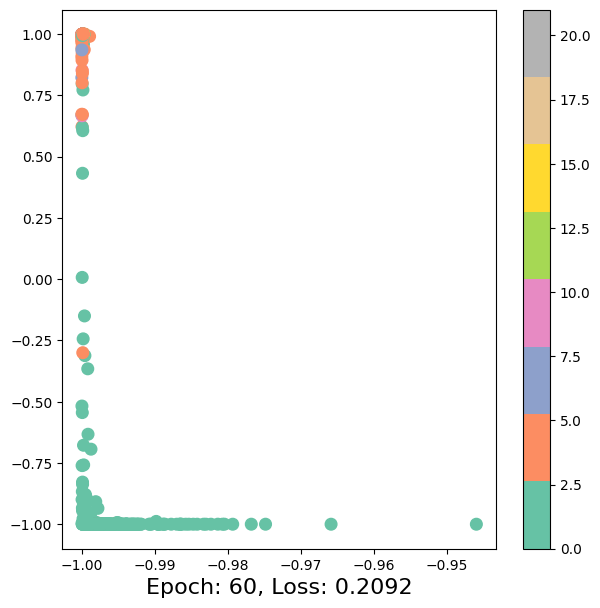

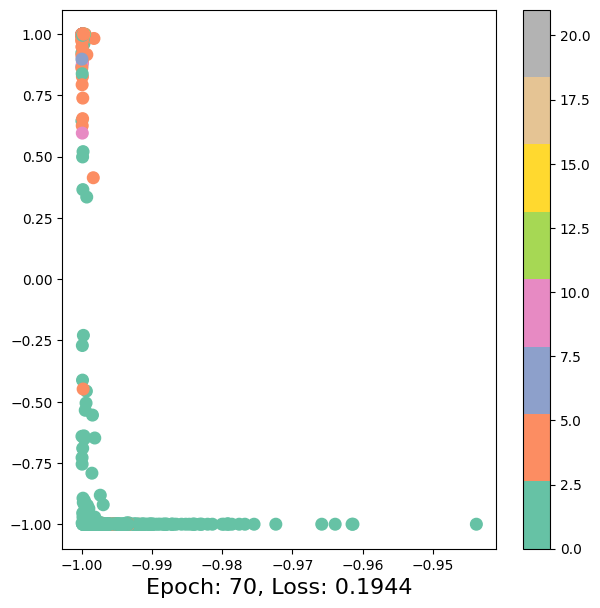

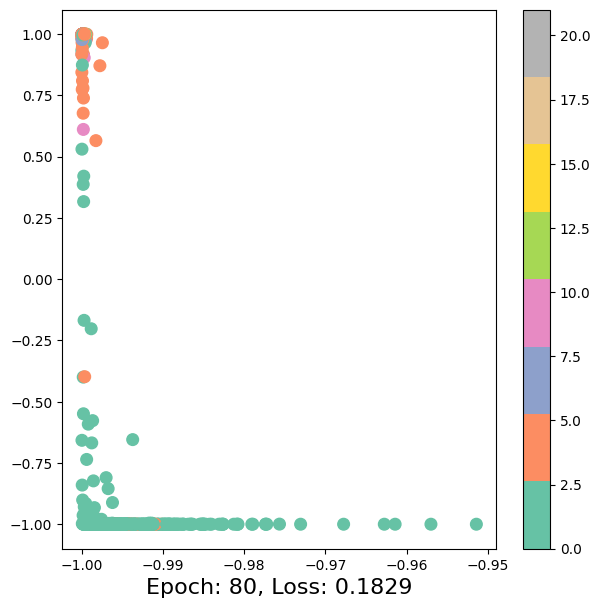

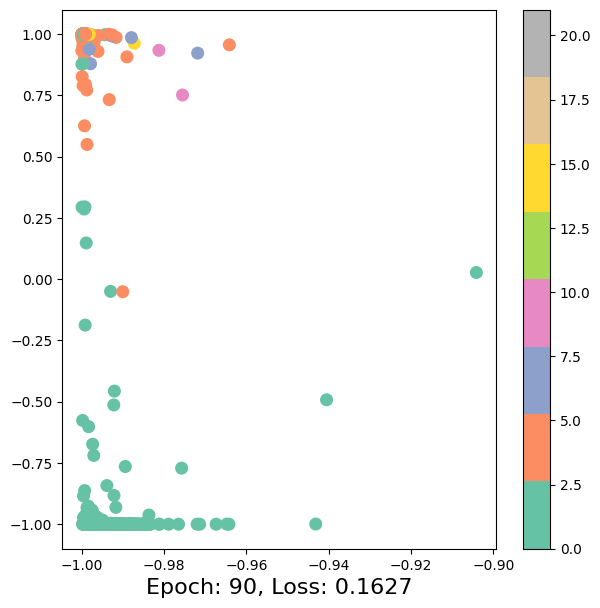

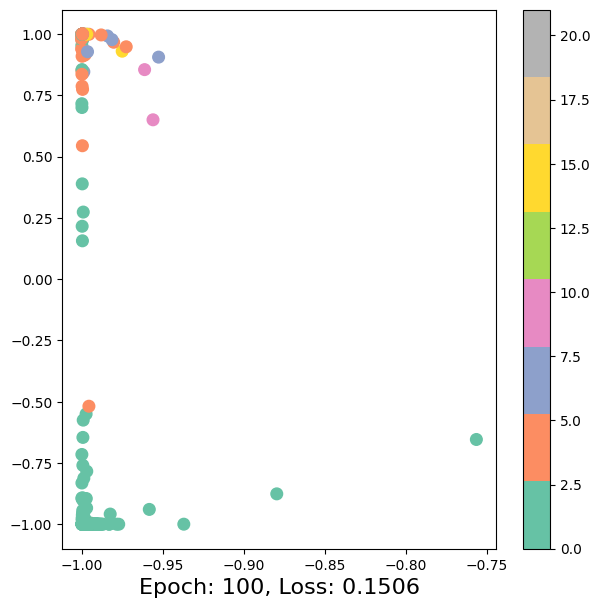

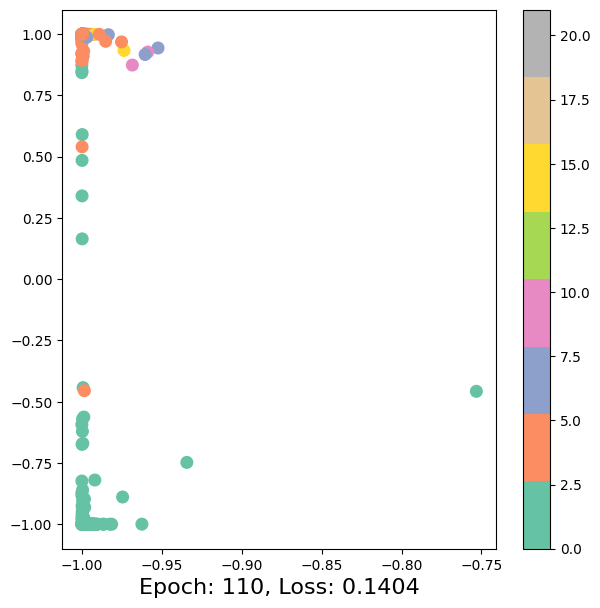

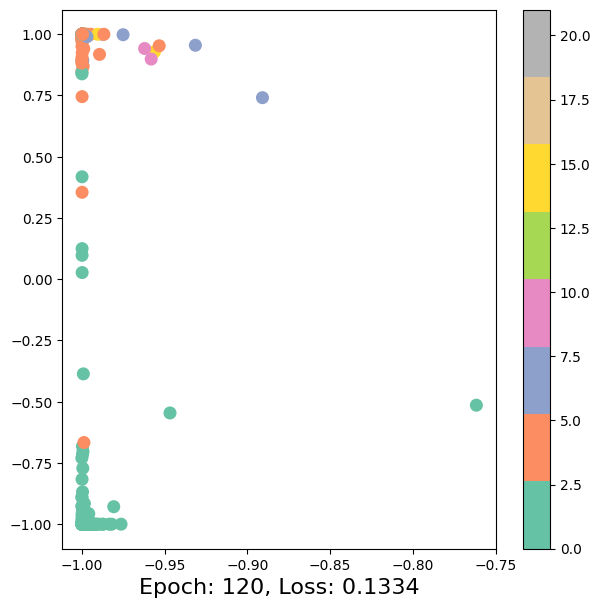

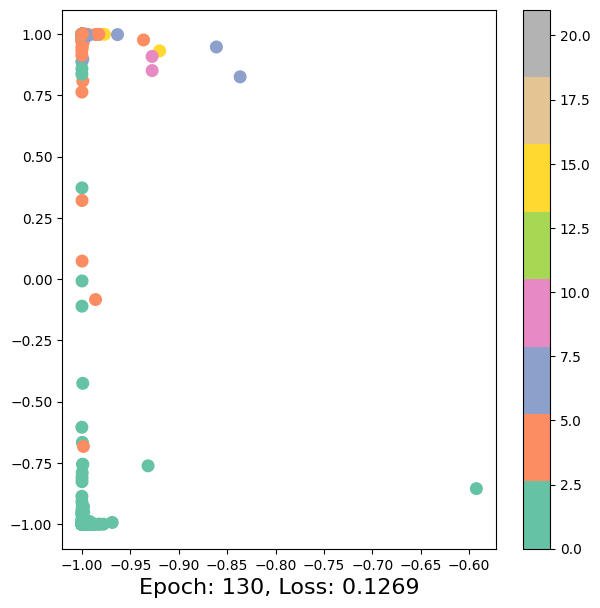

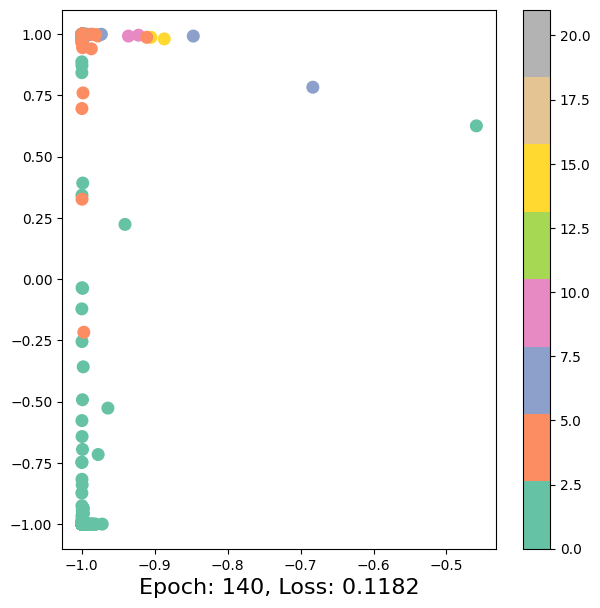

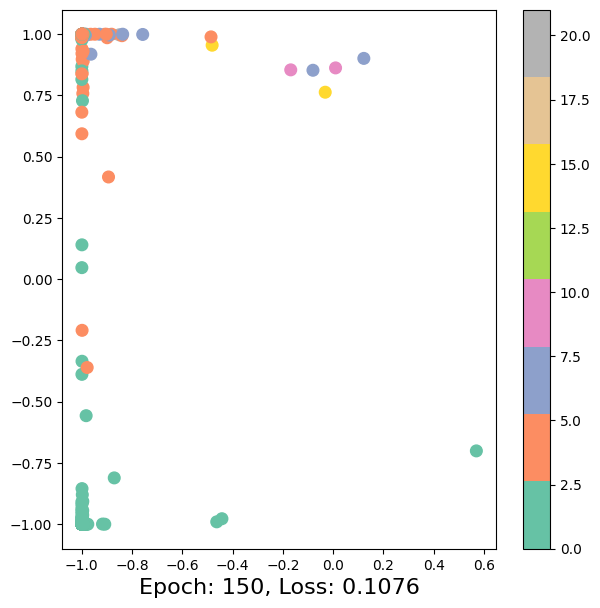

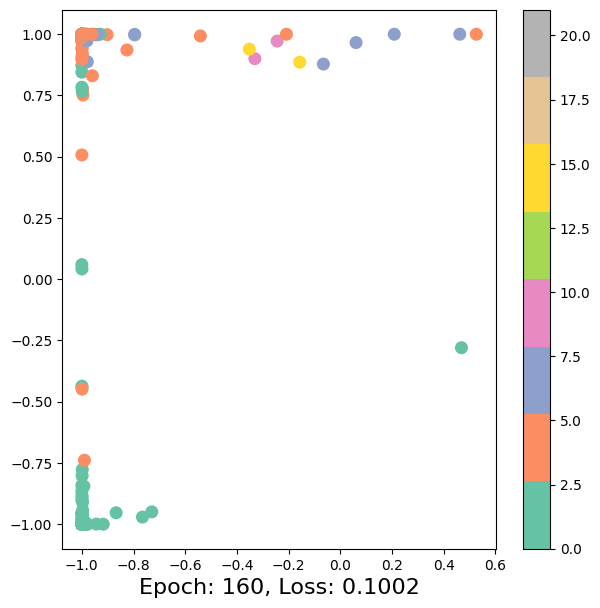

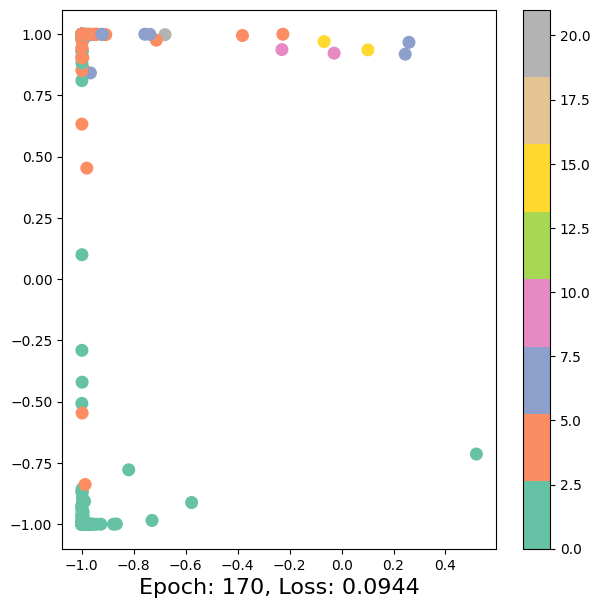

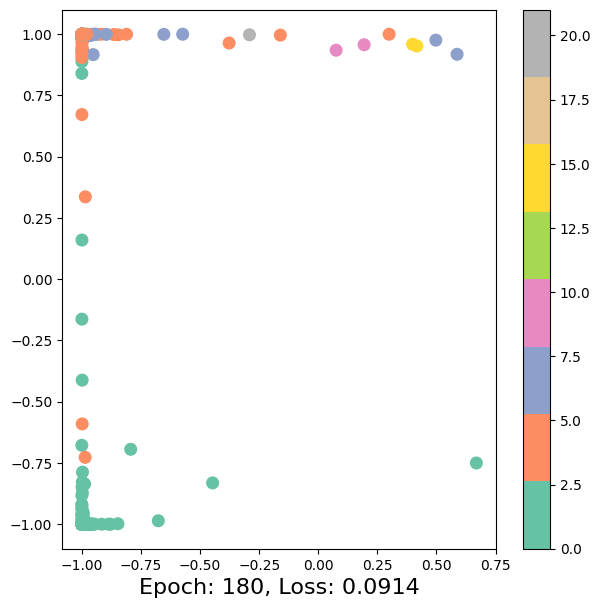

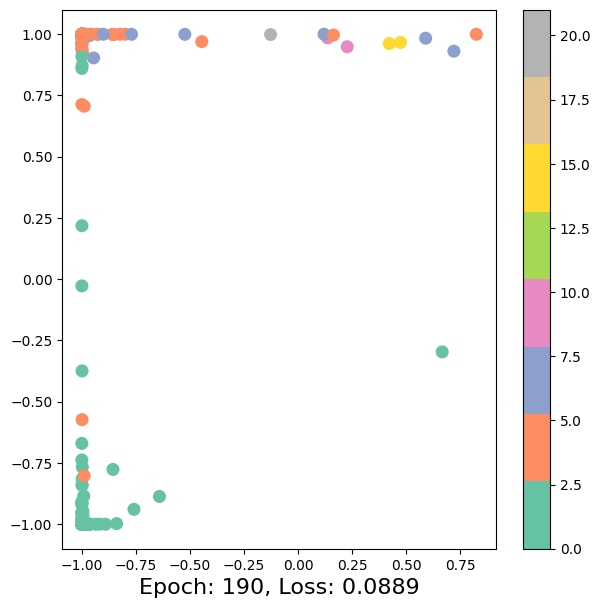

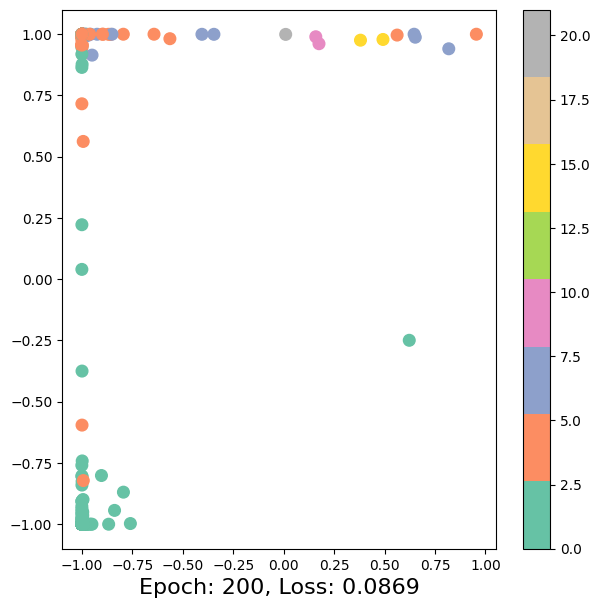

In [260]:
import time
from IPython.display import Javascript  # Restrict height of output cell.

display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.b.float(), data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask].long())  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h
loss_remember=[]
for epoch in range(201):
    loss, h = train(data)
    loss_remember.append(loss)
    if epoch % 10 == 0:
        visualize_embedding(h, color=data.z, epoch=epoch, loss=loss)
        time.sleep(0.1)

Text(0, 0.5, 'Loss')

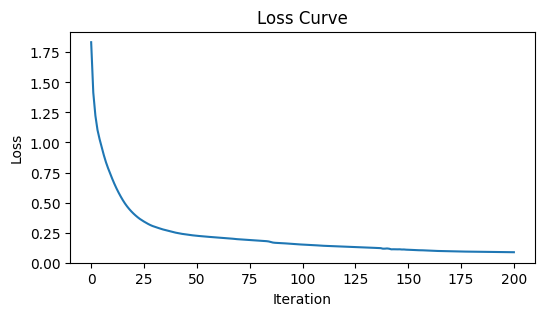

In [261]:
#查看损失函数,这段代码在徐州时进行修改，确保能多次运行而不会出错。
loss_remember_2=loss_remember

import matplotlib.pyplot as plt
import numpy as np

losses = [loss.detach().numpy() if isinstance(loss, torch.Tensor) else loss for loss in loss_remember_2]

plt.figure(figsize=(6, 3))
plt.plot(losses)
plt.title("Loss Curve")
plt.xlabel("Iteration")
plt.ylabel("Loss")


In [262]:
print(h)
print(h.shape)

tensor([[-1.0000, -0.9988, -0.9989,  1.0000,  1.0000, -1.0000],
        [-1.0000, -0.9977, -0.9997,  1.0000,  1.0000, -1.0000],
        [-1.0000, -0.9963, -0.9987,  1.0000,  1.0000, -1.0000],
        ...,
        [ 1.0000, -0.9997, -0.9981, -1.0000, -1.0000, -0.9998],
        [ 1.0000, -0.9997, -0.9885, -1.0000, -1.0000, -0.9979],
        [ 1.0000, -0.9998, -0.9913, -1.0000, -1.0000, -0.9987]],
       grad_fn=<TanhBackward0>)
torch.Size([519, 6])


# 通过线性分割获取历史城区节点

In [263]:
#节点和数字间的映射关系(翻转)
print(reversed_dict)

{'西门': '0', '湖头街': '1', '光荣路': '2', '陆庄': '3', '高峰桥': '4', '南街': '5', '道山路口': '6', '南门': '7', '茶亭': '8', '洋头口': '9', '省人民医院': '10', '文化宫': '11', '达道': '12', '地铁达道站': '13', '新玉环路': '14', '安平小区': '15', '闽江之心(台州步行街)': '16', '桥南': '17', '埔顶': '18', '龙津站': '19', '三叉街': '20', '三叉街新村': '21', '则徐大道盖山路口': '22', '白湖亭': '23', '火车站北广场': '24', '铁道医院': '25', '华林高架': '26', '湖塍': '27', '洋下新村': '28', '省图书馆': '29', '温泉路口': '30', '闽江饭店': '31', '蒙古营': '32', '龙华天桥': '33', '五一广场': '34', '市政务服务中心': '35', '茶亭公园': '36', '汇多利': '37', '市一医院': '38', '十四桥': '39', '朝阳路口': '40', '朝阳路': '41', '港头(朝阳路)': '42', '中垱': '43', '美墩桥': '44', '过洲岛': '45', '华威大厦(江边村)': '46', '东部办公区(石碑兜)': '47', '仓山浦下': '48', '龙舟河': '49', '公交海峡国际会展中心西站': '50', '火车站南广场': '51', '茶园': '52', '电建二公司': '53', '于山': '54', '乌山路口': '55', '福州市政府': '56', '上海街道': '57', '白马河': '58', '宝龙城市广场': '59', '祥坂路口': '60', '福祥社区': '61', '上浦路口': '62', '市人才储备中心': '63', '榕城广场': '64', '福州金山中学': '65', '金祥路金洲路口': '66', '金洲南路金山地铁站': '67', '卢滨路东': '68', '卢滨路': '69', '金山公园北门': 

In [264]:
H=[]
for  i in range(len(attribute_label)):
  if h[i][3]>0.5  :#and h[i][1]>=-1
    H.append(i)
  else:
     pass

H=np.array(H)

In [265]:
print(H.shape)
H

(132,)


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        14,  15,  16,  17,  18,  19,  20,  32,  33,  34,  38,  39,  40,
        41,  42,  43,  44,  45,  54,  55,  56,  77,  78,  83,  84,  85,
        86,  87,  88, 101, 102, 112, 113, 114, 115, 116, 117, 130, 131,
       138, 139, 162, 163, 164, 165, 166, 168, 177, 178, 179, 182, 183,
       184, 185, 186, 187, 194, 195, 204, 211, 212, 230, 231, 232, 233,
       234, 235, 240, 241, 246, 247, 248, 263, 264, 265, 266, 267, 268,
       269, 270, 271, 283, 284, 295, 296, 312, 314, 315, 333, 361, 362,
       366, 372, 373, 374, 375, 376, 378, 379, 408, 409, 418, 419, 467,
       468, 469, 475, 476, 477, 478, 479, 487, 488, 489, 490, 493, 512,
       513, 514])

In [266]:
new_list = []
for key in H:
  new_list.append(mapping_dict[str(key)])
new_list

['西门',
 '湖头街',
 '光荣路',
 '陆庄',
 '高峰桥',
 '南街',
 '道山路口',
 '南门',
 '茶亭',
 '洋头口',
 '省人民医院',
 '文化宫',
 '达道',
 '新玉环路',
 '安平小区',
 '闽江之心(台州步行街)',
 '桥南',
 '埔顶',
 '龙津站',
 '三叉街',
 '蒙古营',
 '龙华天桥',
 '五一广场',
 '市一医院',
 '十四桥',
 '朝阳路口',
 '朝阳路',
 '港头(朝阳路)',
 '中垱',
 '美墩桥',
 '过洲岛',
 '于山',
 '乌山路口',
 '福州市政府',
 '九〇〇医院(原总院)',
 '西洪路',
 '浦东',
 '华侨中学(红旗村)',
 '南禅山',
 '福四中',
 '师大(程埔头)',
 '跑马场',
 '旗汛口',
 '三坊七巷',
 '安淡',
 '打铁垱',
 '青年广场',
 '轮工',
 '苍霞嘉兴园',
 '上渡',
 '洪湾高宅',
 '金山浦上公交枢纽站',
 '博美诗邦',
 '汽车站',
 '左海公园',
 '三角井',
 '屏山',
 '省卫健委',
 '鼓楼',
 '南公园',
 '新厦二区社区',
 '幸福城小区',
 '新店',
 '魁炉头',
 '源脉温泉',
 '龙腰',
 '北门',
 '屏东',
 '八方大厦',
 '世欧广场',
 '象园街道',
 '屏山公园',
 '中亭街',
 '台江医院',
 '仙塔街',
 '格致中学',
 '协和医院',
 '文化宫西门',
 '洋中亭',
 '马口',
 '公交苍霞站',
 '苍霞新城',
 '黄山',
 '福建省地质医院',
 '排下',
 '仓山步行街',
 '十棉祠',
 '观井',
 '中洲岛',
 '学军路',
 '河下路',
 '浦西社区',
 '德榜路新兴路口',
 '尤溪洲(东)停车场',
 '长寿社',
 '帮洲',
 '福大东门',
 '西禅寺',
 '学军路东',
 '省话剧院',
 '福二中',
 '乌山小学',
 '东街口',
 '蓬埕',
 '师大',
 '熊猫世界',
 '双安城',
 '福建博物馆',
 '梅峰宾馆',
 '省政府',
 '尤溪洲(西)公交站',
 '龙津',
 '葛屿村',
 '金山公交中心停车场',
 '斗池',

**寻找new_list之间的链接关系(获取节点的邻居)**

In [267]:
# 读取CSV文件
df_links = df
df_attributes = df_2

# 创建一个空的多重图
G_new = nx.MultiGraph()

# 添加节点和边到多重图
for _, row in df_links.iterrows():
    node1 = row['前一节点']
    node2 = row['后一节点']
    edge_attr = row['线路名称']
    if pd.notna(node1) and pd.notna(node2):
        G_new.add_edge(node1, node2, attribute=edge_attr)


# 添加节点属性到多重图
for _, row in df_attributes.iterrows():
    node = row['节点名称']
    #attr1 = row['区域属性']
    attr2 = row['线路']
    attr3 = row['500M内文保单位/古迹遗址/宗祠故地的个数']
    #attr4 = row['300M内文保单位/古迹遗址/宗祠故地的个数']
    #attr5 = row['800M内文保单位/古迹遗址/宗祠故地的个数']

    if pd.notna(node):
        G_new.add_node(node)
        #G_new.nodes[node]['区域属性'] = attr1
        G_new.nodes[node]['线路'] = attr2
        G_new.nodes[node]['500M内文保单位/古迹遗址/宗祠故地的个数'] = attr3

        #G_new.nodes[node]['300M内文保单位/古迹遗址/宗祠故地的个数'] = attr4

        #G_new.nodes[node]['800M内文保单位/古迹遗址/宗祠故地的个数'] = attr5


In [268]:
result = []
for m in new_list:
    neighbors = G_new.neighbors(m) # 获得节点m的所有邻居
    common_neighbors = [n for n in neighbors if n in new_list] # 保留那些在new_list中的邻居
    result.append([m + ":" + ", ".join(common_neighbors)])

result

[['西门:湖头街, 西湖, 高峰桥, 陆庄'],
 ['湖头街:西门, 光荣路, 西洪路'],
 ['光荣路:湖头街, 陆庄'],
 ['陆庄:光荣路, 高峰桥, 西门'],
 ['高峰桥:陆庄, 南街, 三坊七巷, 省话剧院, 西门'],
 ['南街:高峰桥, 道山路口, 鼓楼, 尚宾路口'],
 ['道山路口:南街, 南门, 于山, 乌山路口'],
 ['南门:道山路口, 茶亭, 协和医院, 五一广场'],
 ['茶亭:南门, 洋头口'],
 ['洋头口:茶亭, 省人民医院, 博美诗邦'],
 ['省人民医院:洋头口, 文化宫, 博美诗邦, 文化宫西门, 安淡'],
 ['文化宫:省人民医院, 达道, 中亭街, 学军路东'],
 ['达道:文化宫, 中亭街'],
 ['新玉环路:安平小区'],
 ['安平小区:新玉环路, 闽江之心(台州步行街), 十四桥, 青年广场, 打铁垱'],
 ['闽江之心(台州步行街):安平小区, 桥南, 十四桥, 朝阳路口, 台江医院, 青年广场'],
 ['桥南:闽江之心(台州步行街), 埔顶, 十棉祠, 观井, 仓山步行街, 桥北'],
 ['埔顶:桥南, 龙津站, 龙津'],
 ['龙津站:埔顶, 三叉街'],
 ['三叉街:龙津站, 跑马场, 龙津'],
 ['蒙古营:龙华天桥, 东街口, 八方大厦'],
 ['龙华天桥:蒙古营, 五一广场, 于山'],
 ['五一广场:龙华天桥, 南门'],
 ['市一医院:十四桥, 学军路东'],
 ['十四桥:市一医院, 闽江之心(台州步行街), 打铁垱, 安平小区'],
 ['朝阳路口:闽江之心(台州步行街), 朝阳路'],
 ['朝阳路:朝阳路口, 港头(朝阳路)'],
 ['港头(朝阳路):朝阳路, 中垱'],
 ['中垱:港头(朝阳路), 美墩桥'],
 ['美墩桥:中垱, 过洲岛'],
 ['过洲岛:美墩桥'],
 ['于山:龙华天桥, 乌山路口, 道山路口, 协和医院'],
 ['乌山路口:于山, 福州市政府, 道山路口'],
 ['福州市政府:乌山路口, 福二中'],
 ['九〇〇医院(原总院):西洪路, 熊猫世界'],
 ['西洪路:九〇〇医院(原总院), 熊猫世界, 湖头街'],
 ['浦东:华侨中学(红旗村)'],
 ['华侨中学(红旗村):浦东, 南禅山'],
 

**查询方式**

In [281]:
target = "湖头街"

matching_sublists = [sublist for sublist in result if target in sublist[0]]

matching_sublists

[['西门:湖头街, 西湖, 高峰桥, 陆庄'],
 ['湖头街:西门, 光荣路, 西洪路'],
 ['光荣路:湖头街, 陆庄'],
 ['西洪路:九〇〇医院(原总院), 熊猫世界, 湖头街']]

# **三维可视化**

In [282]:
h.shape
B=data.y
B.shape
# 将NumPy数组转换为Python列表
h_1= h.tolist()
B_1=B.tolist()

In [272]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

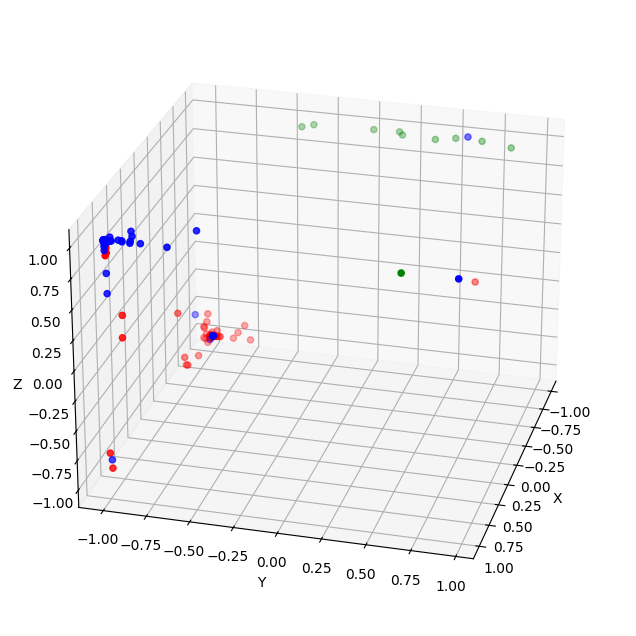

In [283]:
# 提取h的坐标数据
x = [row[4] for row in h_1]
y = [row[2] for row in h_1]
z = [row[3] for row in h_1]

# 创建三维图形对象
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制散点图，并根据列表B的值设置不同的颜色   红：普通点 蓝色：边缘历史点 绿色：核心历史点
colors = ['red', 'blue', 'green']
label_set = set(B_1)  # 获取唯一的标签值
for label in label_set:
    indices = [i for i, value in enumerate(B_1) if value == label]
    ax.scatter([x[i] for i in indices], [y[i] for i in indices], [z[i] for i in indices], c=colors[label], marker='o')

# 设置坐标轴标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


# 设置初始视角  elev表示俯仰角  azim表示方位角
ax.view_init(elev=25, azim=15)

# 显示图形
plt.show()